In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Loading in data
df = pd.read_csv('football_clean.csv')

# Basic Information

> The dataset consists of 25,979 rows and 64 columns.

> Issues fixed during data cleaning: 
- Some columns have a high percentage of missing values. 
- There are possibly duplicated columns.
- Not all data types appear to be correct. 
- some of the columns are no longer needed such as those containing IDs. 

> A full dive into the code and process can be seen in the accompanying EDA. 

## At a glance

### Columns

- country_name: The country in which the football league is located.
- league_name: The name of the football league.
- season: The season during which the matches were played, typically spanning two years (e.g., 2008/2009).
- date: The date on which the match was played.
- home_team_long_name: The full name of the home team.
- away_team_long_name: The full name of the away team.
- home_team_goal: The number of goals scored by the home team.
- away_team_goal: The number of goals scored by the away team.
- home_buildUpPlaySpeed: A numerical indicator of how quickly the home team builds up their play.
- home_buildUpPlayPassing: A numerical indicator of the passing style of the home team during build-up play.
- home_chanceCreationPassing: A numerical indicator of the passing style of the home team in creating scoring chances.
- home_chanceCreationCrossing: A numerical indicator of the crossing style of the home team in creating scoring chances.
- home_chanceCreationShooting: A numerical indicator of the shooting style of the home team in creating scoring chances.
- home_defencePressure: A numerical indicator of the defensive pressure applied by the home team.
- home_defenceAggression: A numerical indicator of the defensive aggression of the home team.
- home_defenceTeamWidth: A numerical indicator of the width of the home team's defense.
- away_buildUpPlaySpeed: A numerical indicator of how quickly the away team builds up their play.
- away_buildUpPlayPassing: A numerical indicator of the passing style of the away team during build-up play.
- away_chanceCreationPassing: A numerical indicator of the passing style of the away team in creating scoring chances.
- away_chanceCreationCrossing: A numerical indicator of the crossing style of the away team in creating scoring chances.
- away_chanceCreationShooting: A numerical indicator of the shooting style of the away team in creating scoring chances.
- away_defencePressure: A numerical indicator of the defensive pressure applied by the away team.
- away_defenceAggression: A numerical indicator of the defensive aggression of the away team.
- away_defenceTeamWidth: A numerical indicator of the width of the away team's defense.

### Descriptive Statistics

In [4]:
df.describe()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlayPassing,home_chanceCreationPassing,home_chanceCreationCrossing,home_chanceCreationShooting,home_defencePressure,home_defenceAggression,home_defenceTeamWidth,home_id,away_buildUpPlaySpeed,away_buildUpPlayPassing,away_chanceCreationPassing,away_chanceCreationCrossing,away_chanceCreationShooting,away_defencePressure,away_defenceAggression,away_defenceTeamWidth,away_id
count,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000
mean,1.544594,1.160938,40.291274,43.127988,48.764810,51.415720,54.819123,45.489280,48.367297,50.934678,739.437584,40.293968,43.130298,48.769160,51.417414,54.816852,45.490088,48.366912,50.934524,739.585781
std,1.297158,1.142110,9.722794,11.000947,11.308411,11.393565,10.351496,11.700137,12.347933,11.612849,422.098768,9.723528,11.000927,11.307444,11.392242,10.352325,11.699210,12.347979,11.613100,422.112888
min,0.000000,0.000000,20.000000,22.000000,21.000000,24.000000,30.000000,23.000000,24.000000,30.000000,3.000000,20.000000,22.000000,21.000000,24.000000,30.000000,23.000000,24.000000,30.000000,3.000000
25%,1.000000,0.000000,30.000000,35.000000,40.000000,44.000000,49.000000,37.000000,40.000000,45.000000,397.000000,30.000000,35.000000,40.000000,44.000000,49.000000,37.000000,40.000000,45.000000,397.000000
50%,1.000000,1.000000,40.000000,44.000000,49.000000,51.000000,55.000000,45.000000,47.000000,51.000000,746.000000,40.000000,44.000000,49.000000,51.000000,55.000000,45.000000,47.000000,51.000000,746.000000
75%,2.000000,2.000000,48.000000,51.000000,55.000000,60.000000,63.000000,52.000000,57.000000,60.000000,1113.000000,48.000000,51.000000,55.000000,60.000000,63.000000,52.000000,57.000000,60.000000,1113.000000
max,10.000000,9.000000,70.000000,77.000000,80.000000,78.000000,73.000000,70.000000,70.000000,70.000000,1454.000000,70.000000,77.000000,80.000000,78.000000,73.000000,70.000000,70.000000,70.000000,1454.000000


# Top Insights

## 1. Unexpected Correlation Between Build-Up Play Speed and Goals
I observed a weak negative correlation between a team's build-up play speed and the number of goals scored. This finding is intriguing as it contradicts the common assumption that faster build-up play leads to more scoring opportunities.

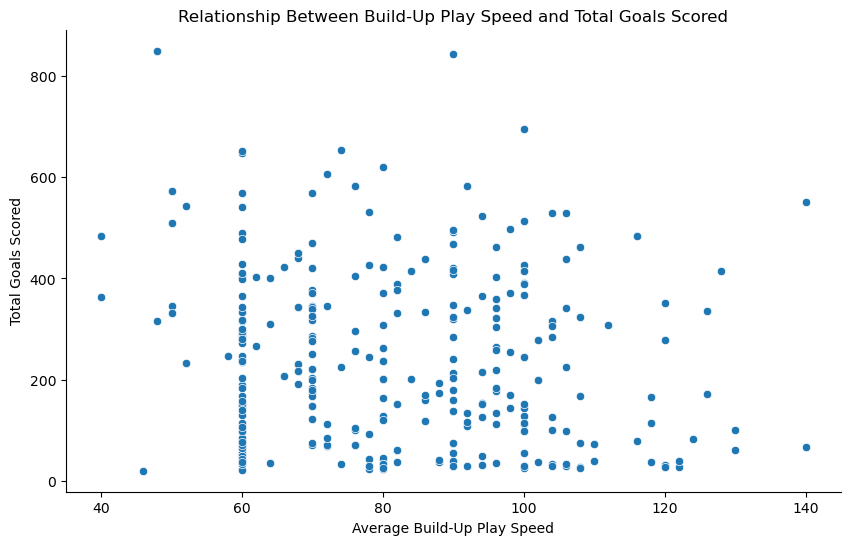

In [7]:
home_teams = df.groupby('home_team_long_name').agg({'home_buildUpPlaySpeed':'mean', 'home_team_goal':'sum'}).rename(columns={'home_buildUpPlaySpeed': 'avg_buildUpPlaySpeed', 'home_team_goal': 'total_goals'})
away_teams = df.groupby('away_team_long_name').agg({'away_buildUpPlaySpeed':'mean', 'away_team_goal':'sum'}).rename(columns={'away_buildUpPlaySpeed': 'avg_buildUpPlaySpeed', 'away_team_goal': 'total_goals'})

team_stats = home_teams.add(away_teams, fill_value=0).reset_index().rename(columns={'index': 'team_name'})
create_plot(data=team_stats,
            x_col='avg_buildUpPlaySpeed',
            y_col='total_goals',
            plot_type='scatter',
            title='Relationship Between Build-Up Play Speed and Total Goals Scored',
            x_label='Average Build-Up Play Speed',
            y_label='Total Goals Scored')

## 2. Home Advantage Phenomenon

The data showed a tendency to have more home goals, which aligns with the well-documented "home advantage" in sports. This insight validates the dataset's ability to reflect real-world phenomena. The classification model for predicting match outcomes also showed a tendency to favor home wins!

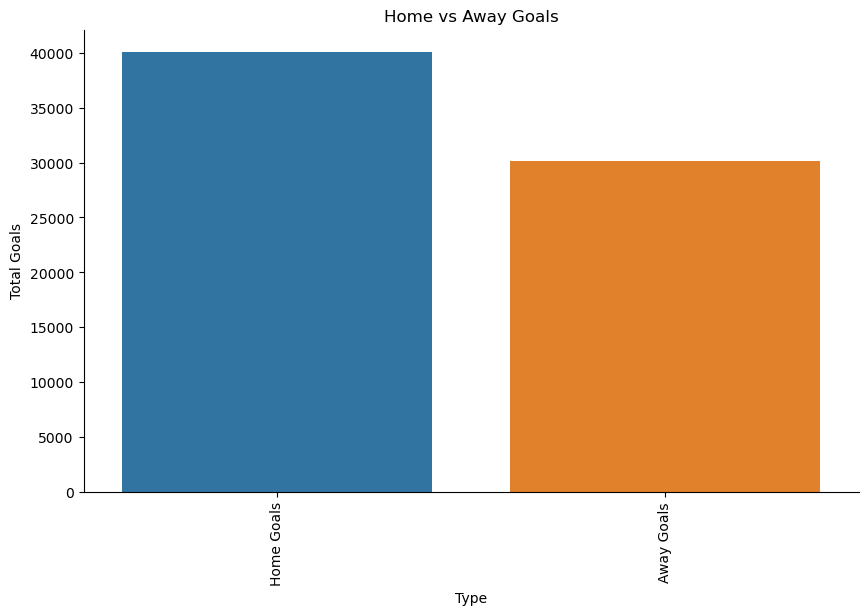

In [10]:
home_advantage_data = pd.DataFrame({
    'Type': ['Home Goals', 'Away Goals'],
    'Goals': [df['home_team_goal'].sum(), df['away_team_goal'].sum()]
})

create_plot(home_advantage_data, 'Type', 'Goals', 'bar', 'Home vs Away Goals', 'Type', 'Total Goals')

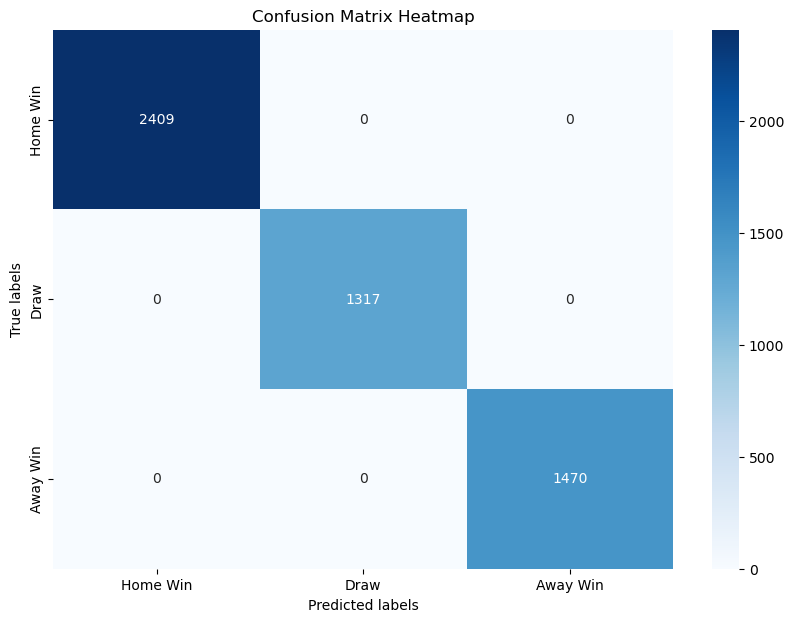

In [15]:
df['match_outcome'] = np.where(df['home_team_goal'] > df['away_team_goal'], 'Home Win',
                               np.where(df['home_team_goal'] < df['away_team_goal'], 'Away Win', 'Draw'))

X = df[['home_team_goal', 'away_team_goal', 'home_buildUpPlaySpeed', 'away_buildUpPlaySpeed']]

y_class = df['match_outcome']

X_train_class, X_test_class, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

logistic_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

logistic_model_pipeline.fit(X_train_class, y_class_train)

y_class_pred = logistic_model_pipeline.predict(X_test_class)

class_conf_matrix = confusion_matrix(y_class_test, y_class_pred, labels=['Home Win', 'Draw', 'Away Win'])

plt.figure(figsize=(10, 7))
sns.heatmap(class_conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Home Win', 'Draw', 'Away Win'], yticklabels=['Home Win', 'Draw', 'Away Win'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


## 3. Home and Away Goal Difference

There are variations in the average goal difference across leagues, which indicate differences in home advantage or the competitive balance within each league. Leagues with higher average goal differences could suggest a stronger home advantage, where home teams tend to score significantly more goals than away teams.

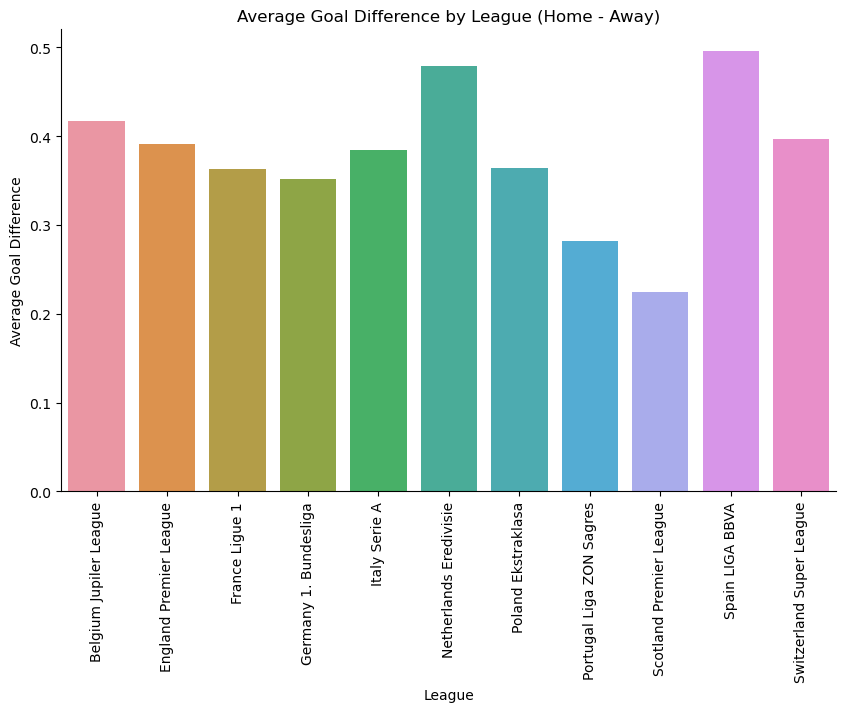

In [16]:
df['goal_difference'] = df['home_team_goal'] - df['away_team_goal']
avg_goal_diff_by_league = df.groupby('league_name')['goal_difference'].mean().reset_index()

create_plot(avg_goal_diff_by_league, 
            'league_name', 
            'goal_difference', 
            'bar', 
            'Average Goal Difference by League (Home - Away)', 
            'League', 
            'Average Goal Difference')